In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# **EDA & Data Preprocessing**

## **Load Data**

In [ ]:
df = pd.read_csv('/content/flight.csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [ ]:
df.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
37117,58397,11/11/2009,11/15/2009,Male,4,haerbin,heilongjiang,CN,40.0,3/31/2014,...,4743.0,6755,10/22/2013,162,39.000000,70,0,0.790463,4794,0
59429,53113,5/16/2012,5/24/2012,Male,4,shenyangshi,liaoningsheng,CN,40.0,3/31/2014,...,0.0,2710,5/28/2012,674,4.000000,4,0,0.500000,954,0
56644,18671,12/17/2005,9/14/2007,Male,4,shanghai,shanghai,CN,45.0,3/31/2014,...,1728.0,2616,3/15/2014,17,3.000000,3,0,0.675000,1677,0
57132,21694,1/4/2010,1/4/2010,Female,4,wuhan,hubei,CN,42.0,3/31/2014,...,0.0,2814,5/19/2012,683,26.000000,26,0,0.601812,1486,0
39216,455,11/13/2012,12/14/2012,Male,4,maoming,guangdong,CN,39.0,3/31/2014,...,2113.0,7356,8/10/2013,235,79.666667,234,0,0.656721,4912,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

*   Feature `FFP_DATE`, `FIRST_FLIGHT_DATE`, `LOAD_TIME`, `LAST_FLIGHT_DATE` seharusnya memiliki tipe data datetime
*   Feature `AGE` seharusnya integer, bukan float



In [ ]:
numerical = ['MEMBER_NO','FFP_TIER','AGE','FLIGHT_COUNT','BP_SUM',
             'SUM_YR_1','SUM_YR_2','SEG_KM_SUM','LAST_TO_END',
             'AVG_INTERVAL','MAX_INTERVAL','EXCHANGE_COUNT',
             'avg_discount','Points_Sum','Point_NotFlight']
df[numerical].describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


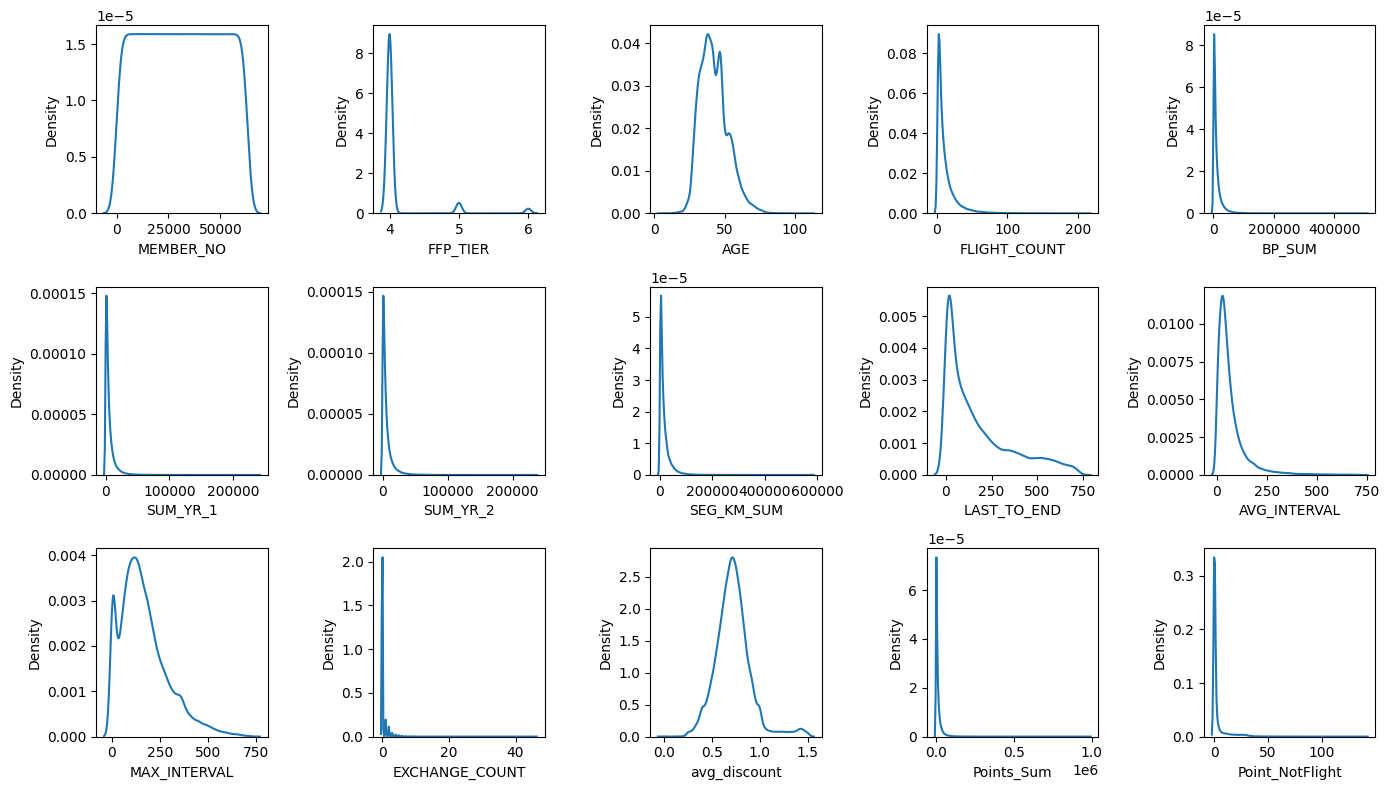

In [ ]:
plt.figure(figsize=(14, 8))
for i in range(0, len(numerical)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(df[numerical[i]])
    plt.tight_layout()

Data `avg_discount` ada yang aneh karena ada data yg lebih dari 1.0 (diskon diatas 100%).

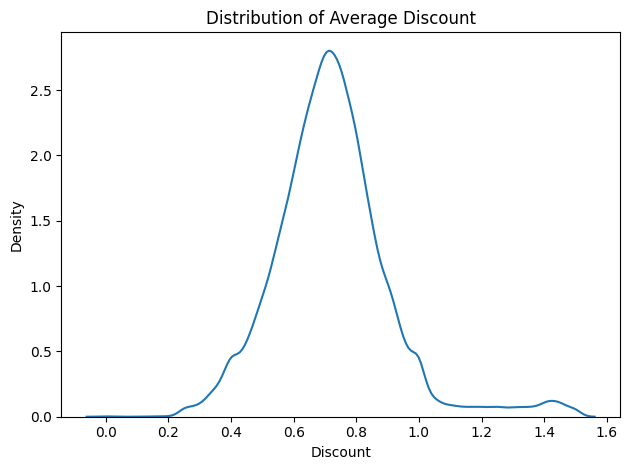

In [ ]:
ax = sns.kdeplot(x = 'avg_discount', data=df)
ax.set_title("Distribution of Average Discount")
ax.set_ylabel("Density")
ax.set_xlabel("Discount")
plt.tight_layout()

Average discount yang > 1 akan di drop, karena dianggap tidak valid (discount max = 1 atau 100%)

In [ ]:
df = df[df['avg_discount']<=1]

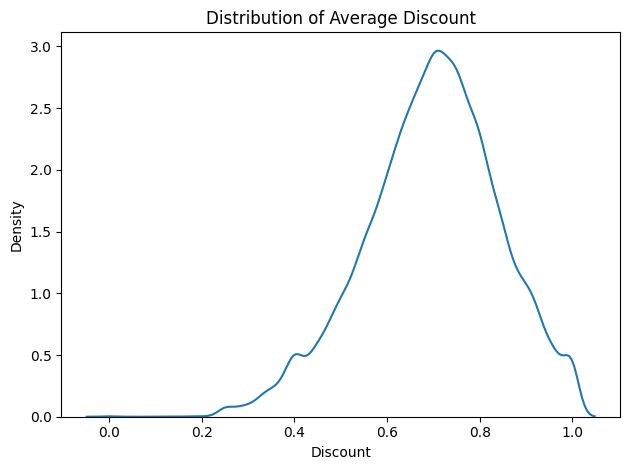

In [ ]:
ax = sns.kdeplot(x = 'avg_discount', data=df)
ax.set_title("Distribution of Average Discount")
ax.set_ylabel("Density")
ax.set_xlabel("Discount")
plt.tight_layout()

In [ ]:
categorical = ['FFP_DATE','FIRST_FLIGHT_DATE','GENDER','WORK_CITY',
               'WORK_PROVINCE','WORK_COUNTRY','LOAD_TIME',
               'LAST_FLIGHT_DATE']
df[categorical].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,60041,60041,60040,57939,57022,60018,60041,60041
unique,3067,3400,2,3060,1093,113,1,731
top,1/13/2011,2/16/2013,Male,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,181,93,45668,9100,16919,55223,60041,906


## **Missing Values Check & Handling**

In [ ]:
counts = df.isna().sum().sort_values(ascending=False)

percents = round(df.isna().mean() * 100, 2).sort_values(ascending=False)

null = pd.concat([counts, percents], axis=1, keys=["null_counts", "%"])
null

,null_counts,%
WORK_PROVINCE,3019,5.03
WORK_CITY,2102,3.50
SUM_YR_1,542,0.90
AGE,389,0.65
SUM_YR_2,134,0.22
WORK_COUNTRY,23,0.04
GENDER,1,0.00
MEMBER_NO,0,0.00
LAST_FLIGHT_DATE,0,0.00
Points_Sum,0,0.00


Terdapat 5 feature yang memiliki missing value : `WORK_PROVINCE`, `WORK_CITY`, `SUM_YR_1`, `AGE`, `SUM_YR_2`, `WORK_COUNTRY`

In [ ]:
df['AGE'] = df['AGE'].fillna(df['AGE'].median())
df['SUM_YR_1'] = df['SUM_YR_1'].fillna(df['SUM_YR_1'].median())
df['SUM_YR_2'] = df['SUM_YR_2'].fillna(df['SUM_YR_2'].median())

In [ ]:
df = df.drop(['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY'], axis = 1)

Diputuskan untuk drop feature tersebut karena `WORK_CITY`, `WORK_PROVINCE`, `WORK_COUNTRY` memiliki unique values yg terlampau banyak, walaupun dari segi missing values masih sedikit dibanding dengan jumlah keseluruhan data, dan juga diputuskan untuk drop kolom `AGE` karena irrelevant (tidak ingin dilakukan segmentasi berdasarkan jenis kelamin).

In [ ]:
df.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
FFP_TIER             0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

## **Check Duplicated Data**

In [ ]:
df.duplicated().sum()

0

Tidak ada duplicated data.

## **Outlier Check**

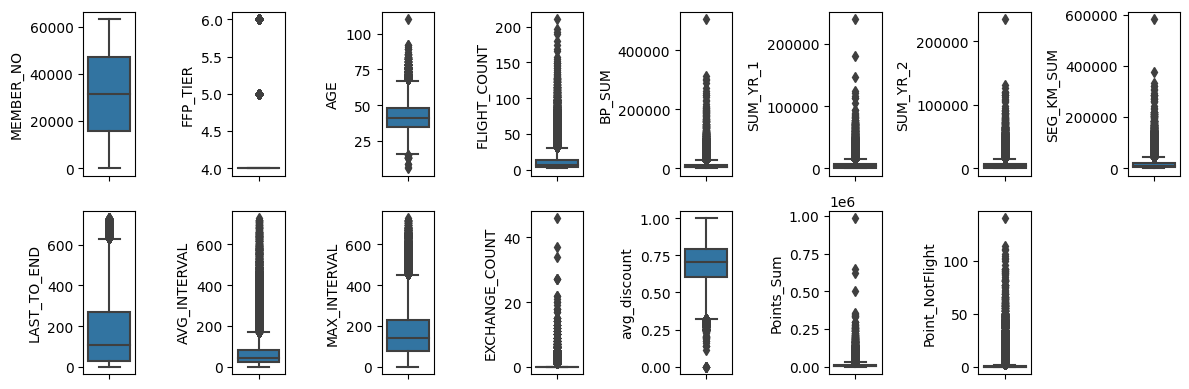

In [ ]:
plt.figure(figsize = (12,4))
for i in range(0, len(numerical)):
    plt.subplot(2, 8, i+1)
    sns.boxplot(y = df[numerical[i]], orient='v')
    plt.tight_layout()

## **Feature Selection & Engineering**

<Axes: >

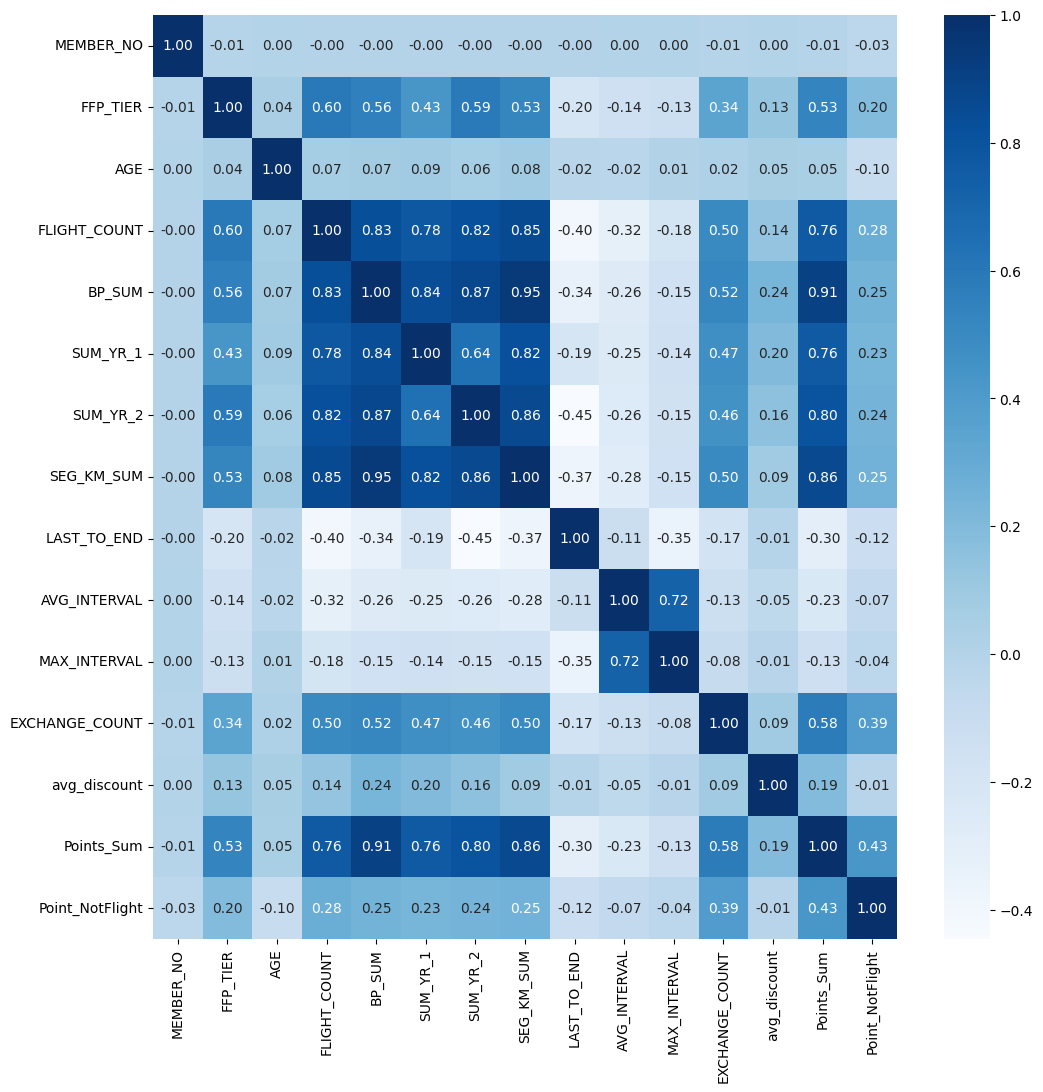

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Feature yang nilai korelasinya rendah dan dianggap tidak berhubungan dalam penyelesaian masalah akan didrop dari dataset: `MEMBER_NO`, `AGE`,`EXCHANGE_COUNT`, `SUM_YR_1`, `SUM_YR_2`, `Point_NotFlight`, `AVG_INTERVAL`,
`MAX_INTERVAL`.

In [ ]:
dfx = df.copy()

In [ ]:
dfx = dfx.drop(['MEMBER_NO','AGE','EXCHANGE_COUNT','SUM_YR_1','SUM_YR_2','Point_NotFlight','AVG_INTERVAL','MAX_INTERVAL'], axis = 1)

In [ ]:
dfx.head()

,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,avg_discount,Points_Sum
0,11/2/2006,12/24/2008,6,3/31/2014,210,505308,580717,3/31/2014,1,0.961639,619760
4,4/10/2009,4/15/2009,6,3/31/2014,152,273844,309928,3/27/2014,5,0.970658,338813
5,2/10/2008,9/29/2009,6,3/31/2014,92,313338,294585,1/13/2014,79,0.967692,343121
6,3/22/2006,3/29/2006,6,3/31/2014,101,248864,287042,3/31/2014,1,0.965347,298873
7,4/9/2010,4/9/2010,6,3/31/2014,73,301864,287230,3/29/2014,3,0.962070,351198


<Axes: >

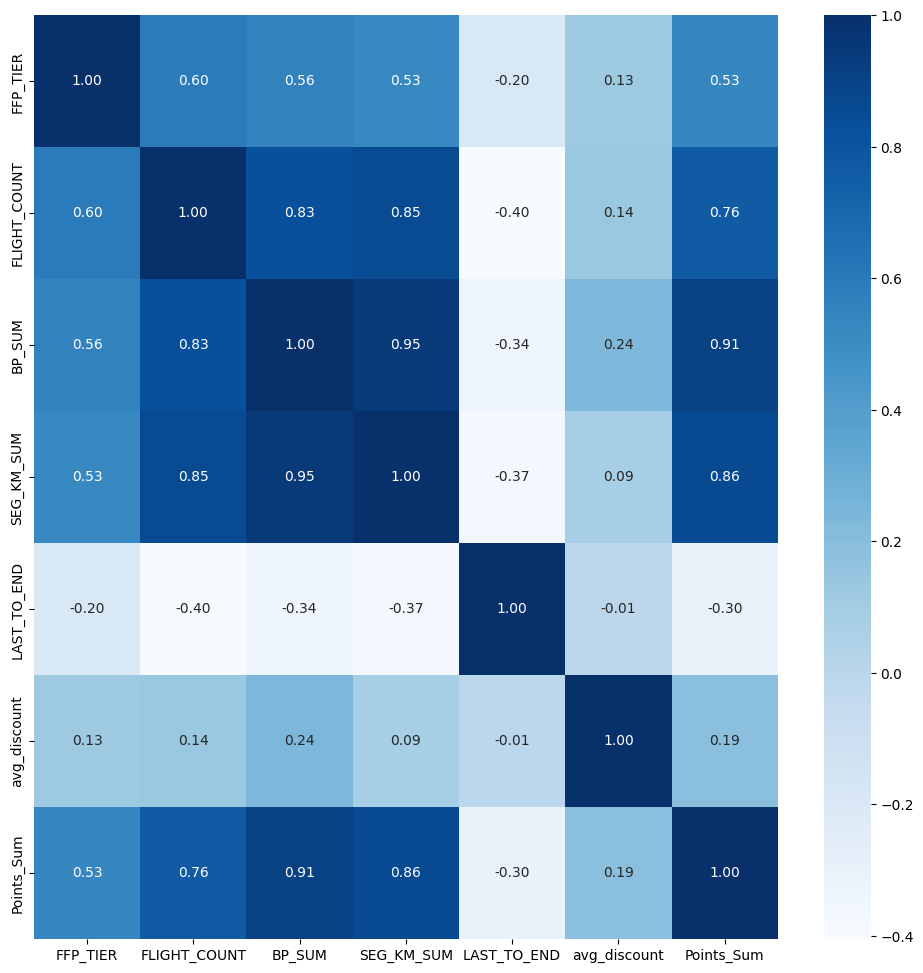

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(dfx.corr(), cmap='Blues', annot=True, fmt='.2f')

Menggunakan LRFMC model. Penjelasan LRFMC menurut Tao (2020) adalah sebagai berikut:
*   L (LOYALTY) : Lama waktu user menjadi membership (dalam bulan) dalam diketahui dari selisih dari waktu observasi dengan waktu menjadi menjadi membership.
*   R (RECENCY) : Jumlah bulan sejak penerbangan terakhir anggota dari akhir waktu observasi.
*   F (FREQUENCY) : Total berapa kali user telah terbang selama periode observasi.
*   M (MONETERY) : Miles atau jarak yang terakumulasi selama waktu observasi user.
*   C (DISCOUNT) : Nilai rata-rata discount factor yang digunakan user selama periode observasi.

Maka feature yang diambil :
*   FPP_DATE (Frequent Flyer Program Join Date)
*   LOAD_TIME (Tanggal Data Diambil)
*   FLIGHT_COUNT (Jumlah Penerbangan Customer)
*   AVG_DISCOUNT (Rata-rata Discount yang Diadapat Customer)
*   SEG_KM_SUM (Total Jarak (km) Penerbangan yang Sudah Dilakukan)
*   LAST_TO_END (Jarak Waktu Penerbangan Terakhir ke Pesanan Penerbangan Paling Terakhir)

Dari heatmap dapat dilihat juga fitur yang berkorelasi sangat tinggi seperti `BP_SUM`, `SEG_KM_SUM`, dan `Points_Sum` sehingga dalam modeling bisa memilih salah satu saja yaitu `SEG_KM_SUM` sehingga `BP_SUM` dan `Points_Sum` akan didrop.

In [ ]:
dfx = dfx.drop(['BP_SUM','Points_Sum'], axis = 1)

In [ ]:
dfx.head()

,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,LOAD_TIME,FLIGHT_COUNT,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,avg_discount
0,11/2/2006,12/24/2008,6,3/31/2014,210,580717,3/31/2014,1,0.961639
4,4/10/2009,4/15/2009,6,3/31/2014,152,309928,3/27/2014,5,0.970658
5,2/10/2008,9/29/2009,6,3/31/2014,92,294585,1/13/2014,79,0.967692
6,3/22/2006,3/29/2006,6,3/31/2014,101,287042,3/31/2014,1,0.965347
7,4/9/2010,4/9/2010,6,3/31/2014,73,287230,3/29/2014,3,0.962070


In [ ]:
dfa = dfx.copy()
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60041 entries, 0 to 62987
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FFP_DATE           60041 non-null  object 
 1   FIRST_FLIGHT_DATE  60041 non-null  object 
 2   FFP_TIER           60041 non-null  int64  
 3   LOAD_TIME          60041 non-null  object 
 4   FLIGHT_COUNT       60041 non-null  int64  
 5   SEG_KM_SUM         60041 non-null  int64  
 6   LAST_FLIGHT_DATE   60041 non-null  object 
 7   LAST_TO_END        60041 non-null  int64  
 8   avg_discount       60041 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 4.6+ MB


Terdapat data tanggal yg salah dimana seharusnya bulan februari 2014 hanya sampai tanggal 28, hal ini akan menyebabkan error ketika ingin mengubah format data menjadi datetime.

In [ ]:
dfa[dfa['LAST_FLIGHT_DATE'] == '2014/2/29  0:00:00']

,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,LOAD_TIME,FLIGHT_COUNT,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,avg_discount
832,7/13/2005,8/6/2005,5,3/31/2014,80,114222,2014/2/29 0:00:00,32,0.664970
1292,11/23/2010,11/23/2010,5,3/31/2014,64,93264,2014/2/29 0:00:00,32,0.682162
1294,12/15/2012,1/5/2013,4,3/31/2014,67,89045,2014/2/29 0:00:00,32,0.714237
1400,1/20/2011,1/20/2011,5,3/31/2014,58,90921,2014/2/29 0:00:00,32,0.676097
1434,2/12/2009,2/13/2009,5,3/31/2014,58,74908,2014/2/29 0:00:00,32,0.810649
...,...,...,...,...,...,...,...,...,...
61539,1/11/2013,7/10/2013,4,3/31/2014,3,3513,2014/2/29 0:00:00,32,0.276667
61871,7/26/2009,7/26/2009,4,3/31/2014,2,1298,2014/2/29 0:00:00,32,0.690000
61909,4/11/2011,4/20/2011,4,3/31/2014,2,2595,2014/2/29 0:00:00,32,0.340000
62721,10/31/2007,3/13/2008,4,3/31/2014,2,1199,2014/2/29 0:00:00,32,0.489525


In [ ]:
dfa['LAST_FLIGHT_DATE'] = df['LAST_FLIGHT_DATE'].replace('2014/2/29  0:00:00', '2014/2/28  0:00:00')

In [ ]:
# Ubah format data yang seharusnya tanggal
dfa["LOAD_TIME"] = pd.to_datetime(dfa["LOAD_TIME"])
dfa["FFP_DATE"] = pd.to_datetime(dfa["FFP_DATE"])
dfa["FIRST_FLIGHT_DATE"] = pd.to_datetime(dfa["FIRST_FLIGHT_DATE"])
dfa["LAST_FLIGHT_DATE"] = pd.to_datetime(dfa["LAST_FLIGHT_DATE"])
dfa["LOAD_TIME"] = dfa["LOAD_TIME"].values.astype('datetime64[ns]')
dfa["FFP_DATE"] = dfa["FFP_DATE"].values.astype('datetime64[ns]')
dfa["FIRST_FLIGHT_DATE"] = dfa["FIRST_FLIGHT_DATE"].values.astype('datetime64[ns]')
dfa["LAST_FLIGHT_DATE"] = dfa["LAST_FLIGHT_DATE"].values.astype('datetime64[ns]')

In [ ]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60041 entries, 0 to 62987
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           60041 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  60041 non-null  datetime64[ns]
 2   FFP_TIER           60041 non-null  int64         
 3   LOAD_TIME          60041 non-null  datetime64[ns]
 4   FLIGHT_COUNT       60041 non-null  int64         
 5   SEG_KM_SUM         60041 non-null  int64         
 6   LAST_FLIGHT_DATE   60041 non-null  datetime64[ns]
 7   LAST_TO_END        60041 non-null  int64         
 8   avg_discount       60041 non-null  float64       
dtypes: datetime64[ns](4), float64(1), int64(4)
memory usage: 4.6 MB


Dibuat feature `Meeting_Time` untuk menghitung jumlah bulan antara `LOAD_TIME` dan `FPP_DATE`

In [ ]:
dfa['Meeting_Time'] = (dfa['LOAD_TIME'] - dfa['FFP_DATE'])/np.timedelta64(1,'M')

In [ ]:
dfa.head()

,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,LOAD_TIME,FLIGHT_COUNT,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,avg_discount,Meeting_Time
0,2006-11-02,2008-12-24,6,2014-03-31,210,580717,2014-03-31,1,0.961639,88.905316
4,2009-04-10,2009-04-15,6,2014-03-31,152,309928,2014-03-27,5,0.970658,59.664469
5,2008-02-10,2009-09-29,6,2014-03-31,92,294585,2014-01-13,79,0.967692,73.627795
6,2006-03-22,2006-03-29,6,2014-03-31,101,287042,2014-03-31,1,0.965347,96.297665
7,2010-04-09,2010-04-09,6,2014-03-31,73,287230,2014-03-29,3,0.962070,47.705292


Dari feature `LAST_FLIGHT_DATE`, `FIRST_FLIGHT_DATE`, dan `FLIGHT COUNT`, dilakukan perhitungan untuk menentukan rata-rata penerbangan per tahun dengan output pada feature `Flight_Count/Year`.

In [ ]:
dfa['Flight_Count/Year']= dfa['FLIGHT_COUNT']/ ((dfa['LAST_FLIGHT_DATE'] - dfa['FIRST_FLIGHT_DATE'])/np.timedelta64(1,'Y'))

In [ ]:
dfa.head()

,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,LOAD_TIME,FLIGHT_COUNT,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,avg_discount,Meeting_Time,Flight_Count/Year
0,2006-11-02,2008-12-24,6,2014-03-31,210,580717,2014-03-31,1,0.961639,88.905316,39.886076
4,2009-04-10,2009-04-15,6,2014-03-31,152,309928,2014-03-27,5,0.970658,59.664469,30.723221
5,2008-02-10,2009-09-29,6,2014-03-31,92,294585,2014-01-13,79,0.967692,73.627795,21.443720
6,2006-03-22,2006-03-29,6,2014-03-31,101,287042,2014-03-31,1,0.965347,96.297665,12.616106
7,2010-04-09,2010-04-09,6,2014-03-31,73,287230,2014-03-29,3,0.962070,47.705292,18.388071


In [ ]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60041 entries, 0 to 62987
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           60041 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  60041 non-null  datetime64[ns]
 2   FFP_TIER           60041 non-null  int64         
 3   LOAD_TIME          60041 non-null  datetime64[ns]
 4   FLIGHT_COUNT       60041 non-null  int64         
 5   SEG_KM_SUM         60041 non-null  int64         
 6   LAST_FLIGHT_DATE   60041 non-null  datetime64[ns]
 7   LAST_TO_END        60041 non-null  int64         
 8   avg_discount       60041 non-null  float64       
 9   Meeting_Time       60041 non-null  float64       
 10  Flight_Count/Year  60041 non-null  float64       
dtypes: datetime64[ns](4), float64(3), int64(4)
memory usage: 5.5 MB


In [ ]:
dfa = dfa.drop(['FFP_DATE','FIRST_FLIGHT_DATE','LAST_FLIGHT_DATE','LOAD_TIME','FLIGHT_COUNT'], axis = 1)

In [ ]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60041 entries, 0 to 62987
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FFP_TIER           60041 non-null  int64  
 1   SEG_KM_SUM         60041 non-null  int64  
 2   LAST_TO_END        60041 non-null  int64  
 3   avg_discount       60041 non-null  float64
 4   Meeting_Time       60041 non-null  float64
 5   Flight_Count/Year  60041 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 3.2 MB


In [ ]:
dfa.head()

,FFP_TIER,SEG_KM_SUM,LAST_TO_END,avg_discount,Meeting_Time,Flight_Count/Year
0,6,580717,1,0.961639,88.905316,39.886076
4,6,309928,5,0.970658,59.664469,30.723221
5,6,294585,79,0.967692,73.627795,21.443720
6,6,287042,1,0.965347,96.297665,12.616106
7,6,287230,3,0.962070,47.705292,18.388071


In [ ]:
dfa.isnull().sum()

FFP_TIER             0
SEG_KM_SUM           0
LAST_TO_END          0
avg_discount         0
Meeting_Time         0
Flight_Count/Year    0
dtype: int64

Jadi 6 feature yang akan dipakai adalah :
1.   FFP_TIER
2.   SEG_KM_SUM
3.   LAST_TO_END
4.   avg_discount
5.   Meeting_Time
6.   Flight_Count/Year

## **Outlier Handling**

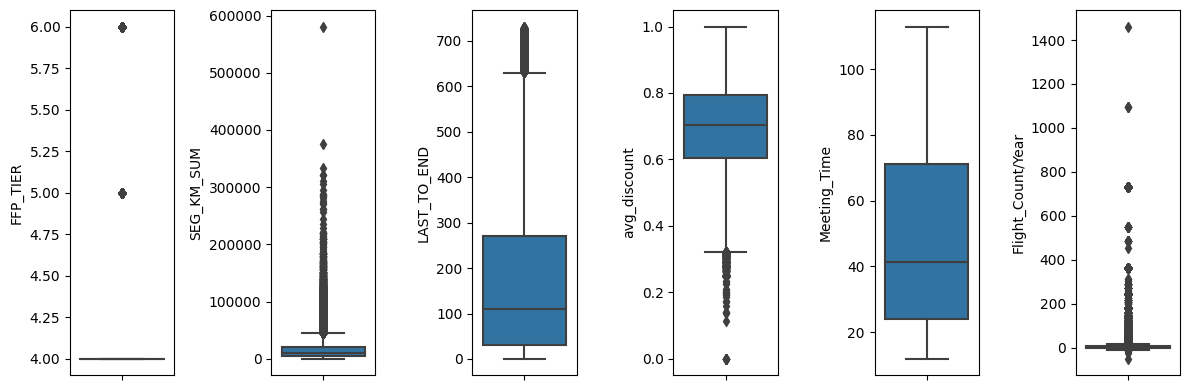

In [ ]:
numerical=['FFP_TIER','SEG_KM_SUM','LAST_TO_END','avg_discount','Meeting_Time',
      'Flight_Count/Year']
plt.figure(figsize = (12,4))
for i in range(0, len(numerical)):
    plt.subplot(1, 6, i+1)
    sns.boxplot(y = dfa[numerical[i]], orient='v')
    plt.tight_layout()

In [ ]:
fil_ent = np.array([True] * len(dfa))
for col in ['SEG_KM_SUM','LAST_TO_END','avg_discount','Meeting_Time','Flight_Count/Year']:
    Q1 = dfa[col].quantile(0.25)
    Q3 = dfa[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    fil_ent = ((dfa[col] >= low_limit) & (dfa[col] <= high_limit)) & fil_ent

dfa = dfa[fil_ent].reset_index()

In [ ]:
dfa = dfa.drop(['FFP_TIER'], axis = 1)

## **Standardisasi**

In [ ]:
dfa =dfa[~dfa.isin([np.nan, np.inf, -np.inf]).any(1)]

In [ ]:
from sklearn.preprocessing import StandardScaler
feature = ['SEG_KM_SUM','LAST_TO_END','avg_discount','Meeting_Time',
         'Flight_Count/Year']
X = dfa[feature].values
X_std = StandardScaler().fit_transform(X)
dfs = pd.DataFrame(data=X_std, columns=feature)

In [ ]:
dfs.head()

,SEG_KM_SUM,LAST_TO_END,avg_discount,Meeting_Time,Flight_Count/Year
0,2.946823,-0.433412,2.186105,-0.640830,2.364728
1,3.151836,-0.776593,1.816499,0.463661,0.441358
2,3.006257,-0.242755,2.044803,2.258308,-0.290352
3,3.039276,1.225298,1.937261,0.669624,-0.609352
4,3.069732,-0.871921,1.869654,0.002352,1.326259


# **Modeling**

<Axes: >

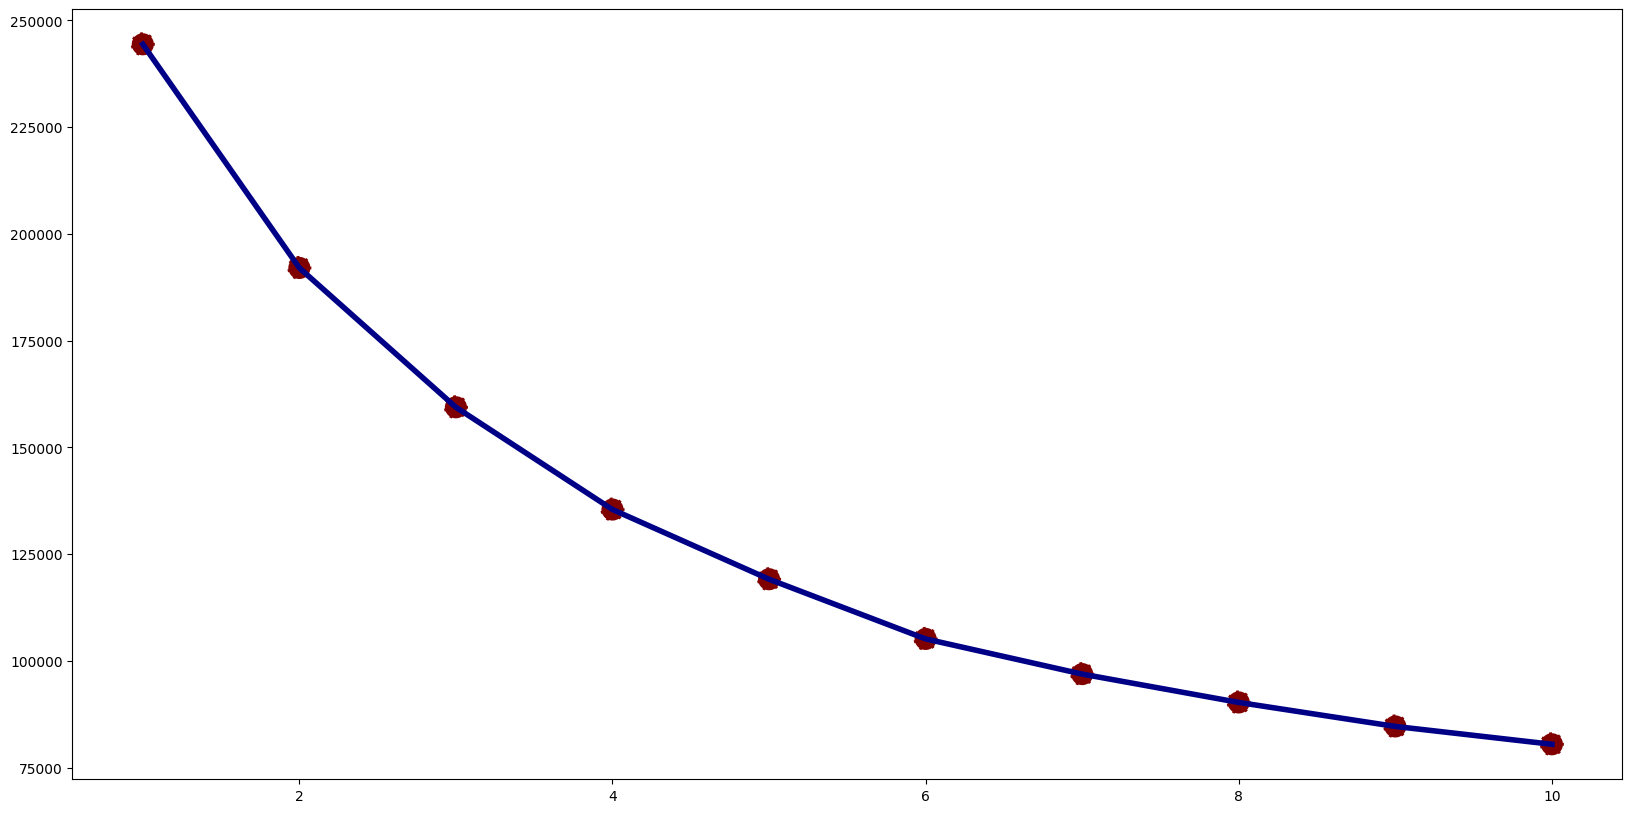

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(dfs)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(20, 10))

sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',
                linestyle='--')

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(dfs.values)

KMeans(n_clusters=4, random_state=0)

In [ ]:
dfs['cluster'] = kmeans.labels_
dfs.head()

,SEG_KM_SUM,LAST_TO_END,avg_discount,Meeting_Time,Flight_Count/Year,cluster
0,2.946823,-0.433412,2.186105,-0.640830,2.364728,3
1,3.151836,-0.776593,1.816499,0.463661,0.441358,3
2,3.006257,-0.242755,2.044803,2.258308,-0.290352,0
3,3.039276,1.225298,1.937261,0.669624,-0.609352,0
4,3.069732,-0.871921,1.869654,0.002352,1.326259,3


In [ ]:
dfa['cluster'] = kmeans.labels_

In [ ]:
display(dfa.groupby('cluster').agg(['mean','median']))

index             SEG_KM_SUM          LAST_TO_END         \
                 mean   median          mean   median        mean median   
cluster                                                                    
0        26201.736749  23285.0  16742.503423  14812.0   86.409062   66.0   
1        44778.385583  46579.0   5888.175837   4660.0  423.737705  418.0   
2        40122.234427  39883.5   8193.562539   7187.5  113.195789   98.0   
3        19449.407476  16176.0  22041.938076  21288.0  104.022057   61.0   

        avg_discount           Meeting_Time            Flight_Count/Year  \
                mean    median         mean     median              mean   
cluster                                                                    
0           0.711096  0.713765    80.700126  80.428756          2.281628   
1           0.734503  0.744960    52.035658  48.033841          2.901803   
2           0.658341  0.663263    32.642721  31.015011          3.640825   
3           0.711473  0.714814    29.312891  24.936857         10.585646   

                   
           median  
cluster            
0        1.896227  
1        1.701440  
2        3.261094  
3        9.987100

# **Visualisasi**

In [ ]:
# Melakukan PCA untuk melihat visualisasi
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(dfs)
pcs = pca.transform(dfs)

In [ ]:
data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['cluster'] = dfs['cluster']
data_pca.head()

,PC 1,PC 2,cluster
0,2.946505,2.369706,3
1,1.443945,2.781105,3
2,-1.909597,3.138136,0
3,-1.378216,1.735236,0
4,2.143560,2.767180,3


<Axes: xlabel='PC 1', ylabel='PC 2'>

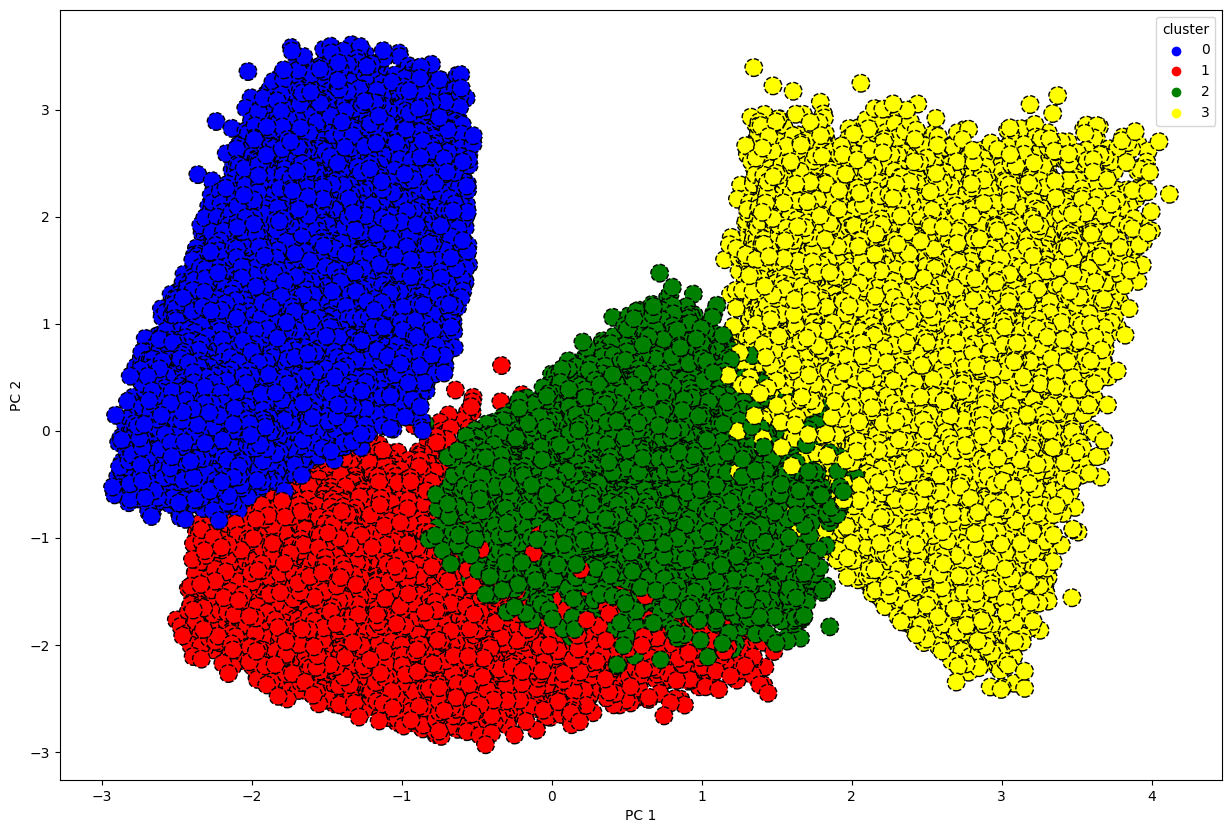

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="cluster",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette=['blue','red','green','yellow'],
    s=160,
    ax=ax
)

# **Insight**

In [ ]:
display(dfa.groupby('cluster').agg(['mean','median']))

index             SEG_KM_SUM          LAST_TO_END         \
                 mean   median          mean   median        mean median   
cluster                                                                    
0        26201.736749  23285.0  16742.503423  14812.0   86.409062   66.0   
1        44778.385583  46579.0   5888.175837   4660.0  423.737705  418.0   
2        40122.234427  39883.5   8193.562539   7187.5  113.195789   98.0   
3        19449.407476  16176.0  22041.938076  21288.0  104.022057   61.0   

        avg_discount           Meeting_Time            Flight_Count/Year  \
                mean    median         mean     median              mean   
cluster                                                                    
0           0.711096  0.713765    80.700126  80.428756          2.281628   
1           0.734503  0.744960    52.035658  48.033841          2.901803   
2           0.658341  0.663263    32.642721  31.015011          3.640825   
3           0.711473  0.714814    29.312891  24.936857         10.585646   

                   
           median  
cluster            
0        1.896227  
1        1.701440  
2        3.261094  
3        9.987100

Interpretasi masing-masing cluster:
1.   Cluster 0 merupakan pelanggan yang telah mendaftar sebagai member cukup lama (rata-rata 81 bulan)
dengan frekuensi terbang sedang (rata-rata 16.743 km) atau sering melakukan penerbangan jarak jauh
mengingat jumlah penerbangan per tahunnya cenderung rendah (rata-rata 2 kali per tahun).
2.   Cluster 1 merupakan pelanggan dengan durasi menjadi member, frekuensi terbang, dan jarak penerbangan
sedang namun memiliki jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir tinggi.
3.   Cluster 2 merupakan pelanggan dengan durasi menjadi member, frekuensi terbang, dan jarak penerbangan
sedang namun memiliki jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir rendah.
4.   Cluster 3 merupakan pelanggan baru (rata-rata 30 bulan) dengan frekuensi terbang tinggi (rata-rata 11 penerbangan per tahun), dengan penerbangan jarak jauh (rata-rata 22.258 km).





Rekomendasi:
1.   Memberikan apresiasi kepada member lama maupun member baru seperti diskon
ataupun promo khusus untuk member agar mereka tetap berlangganan. promo
ataupun diskon disesuaikan dengan segmentasi mereka seperti member yang suka
berpergian jauh maka dikasih promo dengan jarak pererbangan jauh, begitu pula
jarang penerbangan sedang maupun dekat.
2.   Perusahaan dapat menarik pelanggan baru dan mempertahankan pelanggan lama
dengan cara meningkatkan kualitas pelayanan dan memberikan inovasi berkelanjutan
sesuai dengan segmentasi mereka.

